# Healthcare Project

## Project Task: Week 1

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Data Exploration:

#### Loading the Dataset & Visualisation

In [2]:
df_healthcare_dataset=pd.read_csv('health care diabetes.csv')
df_healthcare_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df_healthcare_dataset.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

#### Finding the null values and its trreatments

In [4]:
df_healthcare_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### finding the Zero values in the required variables and replacing with mean values of their respective column variable

In [5]:
# Specify columns with zero values indicating missing data
columns_with_ValueZero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [6]:
#df_healthcare_dataset[columns_with_ValueZero]=df_healthcare_dataset[columns_with_ValueZero].replace(0,pd.NA)
# Replace zeros with the mean of the column
df_healthcare_dataset['Glucose'].replace(0, df_healthcare_dataset['Glucose'].mean(), inplace=True)
df_healthcare_dataset['BloodPressure'].replace(0, df_healthcare_dataset['BloodPressure'].mean(), inplace=True)
df_healthcare_dataset['SkinThickness'].replace(0, df_healthcare_dataset['SkinThickness'].mean(), inplace=True)
df_healthcare_dataset['Insulin'].replace(0, df_healthcare_dataset['Insulin'].mean(), inplace=True)
df_healthcare_dataset['BMI'].replace(0, df_healthcare_dataset['BMI'].mean(), inplace=True)


#### Visualizing the data after the Zero value treatment

In [7]:
df_healthcare_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


#### Ploting the required variables in the histogram for better understanding

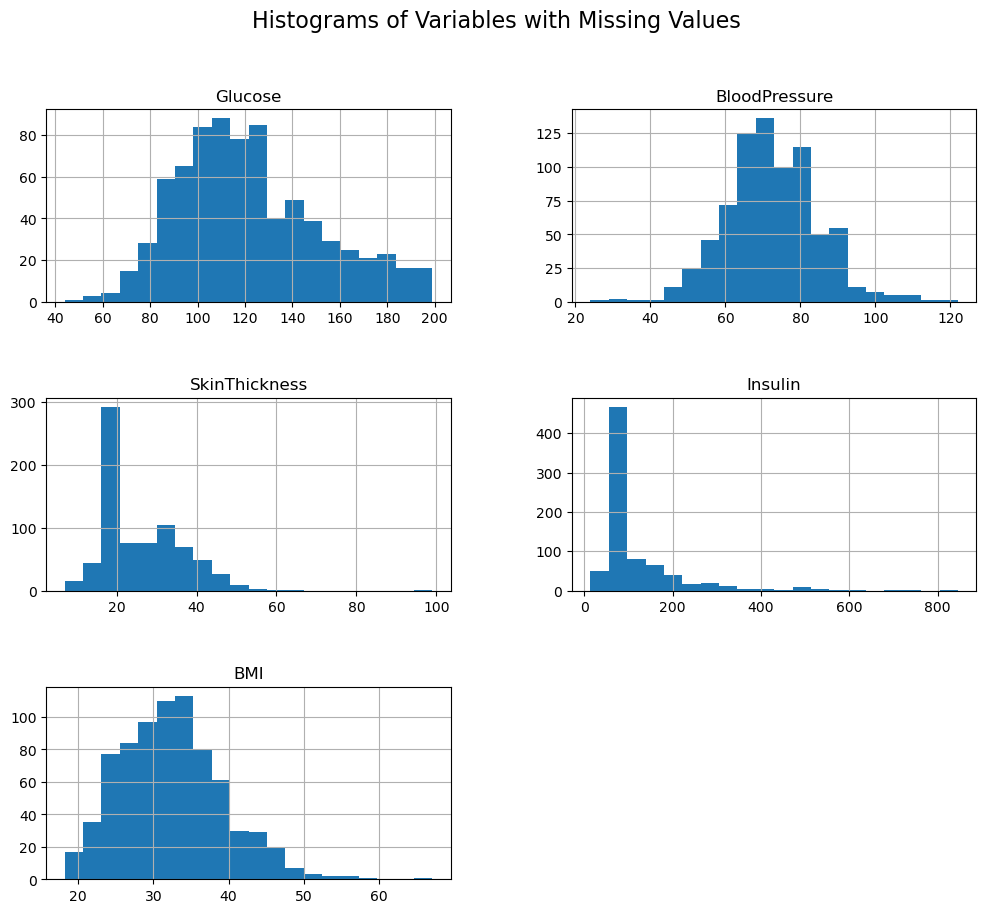

In [8]:
df_healthcare_dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Variables with Missing Values', fontsize=16)
plt.subplots_adjust(hspace=0.5)
plt.show()

#### Checking the datatype

In [9]:
# Count the data types
df_healthcare_dataset_types = df_healthcare_dataset.dtypes
df_healthcare_dataset_types

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
df_healthcare_dataset_types_counts = df_healthcare_dataset_types.astype(str).value_counts()
df_healthcare_dataset_types_counts

float64    6
int64      3
dtype: int64

#### Plotting the count of datatype 

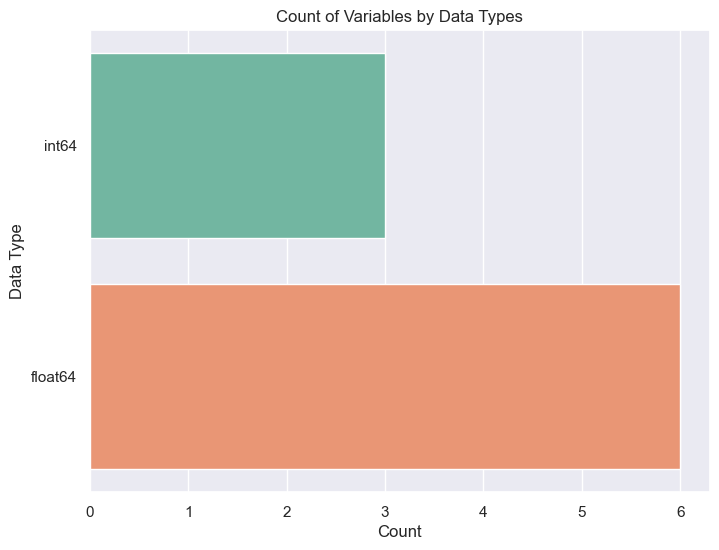

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [11]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.countplot(y=df_healthcare_dataset_types.astype(str), palette="Set2")
plt.title("Count of Variables by Data Types")
plt.xlabel("Count")
plt.ylabel("Data Type")
plt.show()

print(df_healthcare_dataset_types )

#### Plotting the count of our target variable "outcomes"

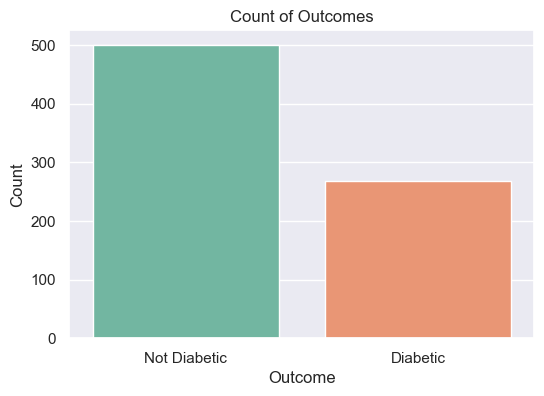

Class Counts:
0    500
1    268
Name: Outcome, dtype: int64


In [12]:
# Plot the count of outcomes
plt.figure(figsize=(6, 4))
sns.set(style="darkgrid")
sns.countplot(x='Outcome', data=df_healthcare_dataset, palette="Set2")
plt.title("Count of Outcomes")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Diabetic', 'Diabetic'])
plt.show()

# Describe the class balance
class_counts = df_healthcare_dataset['Outcome'].value_counts()
print("Class Counts:")
print(class_counts)

####  Plan future course of action need to be performed by resampling the data

#### dividing the data to Independent and dependent variables for performing the resampling techniques
#### Applying Oversampling and Undersampling to understand the scores and accuracy of data 

In [13]:
# Separate features and target variable
X = df_healthcare_dataset.drop('Outcome', axis=1)
y = df_healthcare_dataset['Outcome']

# Apply Oversampling (increase the number of 'Diabetic' instances)
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Apply Undersampling (reduce the number of 'Not Diabetic' instances)
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

# Print the class distribution before and after resampling
print("Class distribution before resampling:", Counter(y))
print("Class distribution after resampling:", Counter(y_resampled))


Class distribution before resampling: Counter({0: 500, 1: 268})
Class distribution after resampling: Counter({0: 500, 1: 500})


#### Applying Train Test split and checking data for Random oversampling and smote

In [14]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train and evaluate models on original, oversampled, and SMOTE data
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

print("Original Data:")
train_and_evaluate(X_train, y_train, X_test, y_test)

print("Oversampled Data:")
train_and_evaluate(X_train_resampled, y_train_resampled, X_test, y_test)

print("SMOTE Data:")
train_and_evaluate(X_train_smote, y_train_smote, X_test, y_test)

Original Data:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154

Oversampled Data:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        99
           1       0.58      0.69      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154

SMOTE Data:
              precision    recall  f1-score   support

           0       0.83      0.73      0.77        99
           1       0.60      0.73      0.66        55

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      

#### Applying the Random forest for resampled data

In [15]:
# Train a classifier on the resampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        99
           1       0.66      0.73      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154



In [16]:
# Train a classifier on the resampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        99
           1       0.66      0.73      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154



#### Ploting scatter charts between the pair of variables to understand the relationships

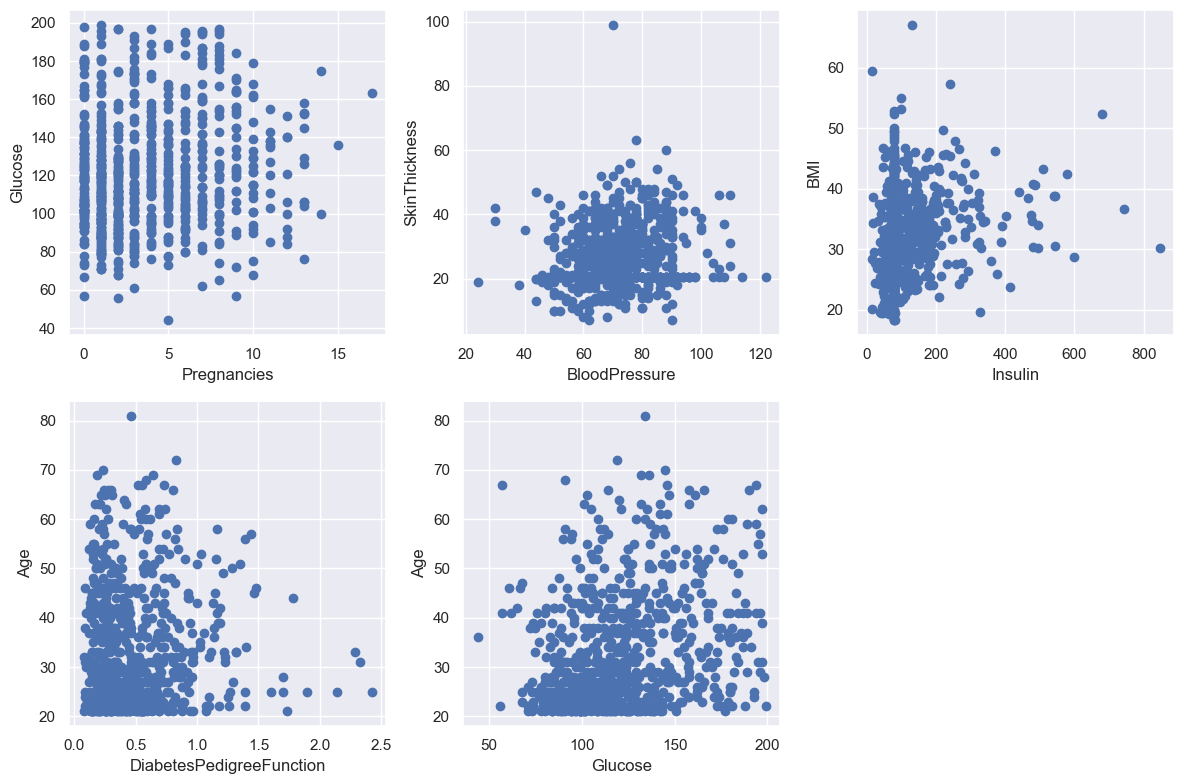

In [17]:
#Scatter plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.scatter(df_healthcare_dataset['Pregnancies'], df_healthcare_dataset['Glucose'])
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')

plt.subplot(2, 3, 2)
plt.scatter(df_healthcare_dataset['BloodPressure'], df_healthcare_dataset['SkinThickness'])
plt.xlabel('BloodPressure')
plt.ylabel('SkinThickness')

plt.subplot(2, 3, 3)
plt.scatter(df_healthcare_dataset['Insulin'], df_healthcare_dataset['BMI'])
plt.xlabel('Insulin')
plt.ylabel('BMI')

plt.subplot(2, 3, 4)
plt.scatter(df_healthcare_dataset['DiabetesPedigreeFunction'], df_healthcare_dataset['Age'])
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Age')

plt.subplot(2, 3, 5)
plt.scatter(df_healthcare_dataset['Glucose'], df_healthcare_dataset['Age'])
plt.xlabel('Glucose')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

Findings:

Pregnancies vs. Glucose: There is a slight positive correlation between the number of pregnancies and glucose levels.

BloodPressure vs. SkinThickness: There might not be a clear linear relationship between blood pressure and skin thickness.

Insulin vs. BMI: The scatter plot might show a scattered pattern with no clear linear relationship.

DiabetesPedigreeFunction vs. Age: There might not be a strong correlation between diabetes pedigree function and age.

Glucose vs. Age: There might be some correlation between glucose levels and age, with higher glucose levels being more common in older individuals.

#### Ploting pairplot of variables to understand the relationships

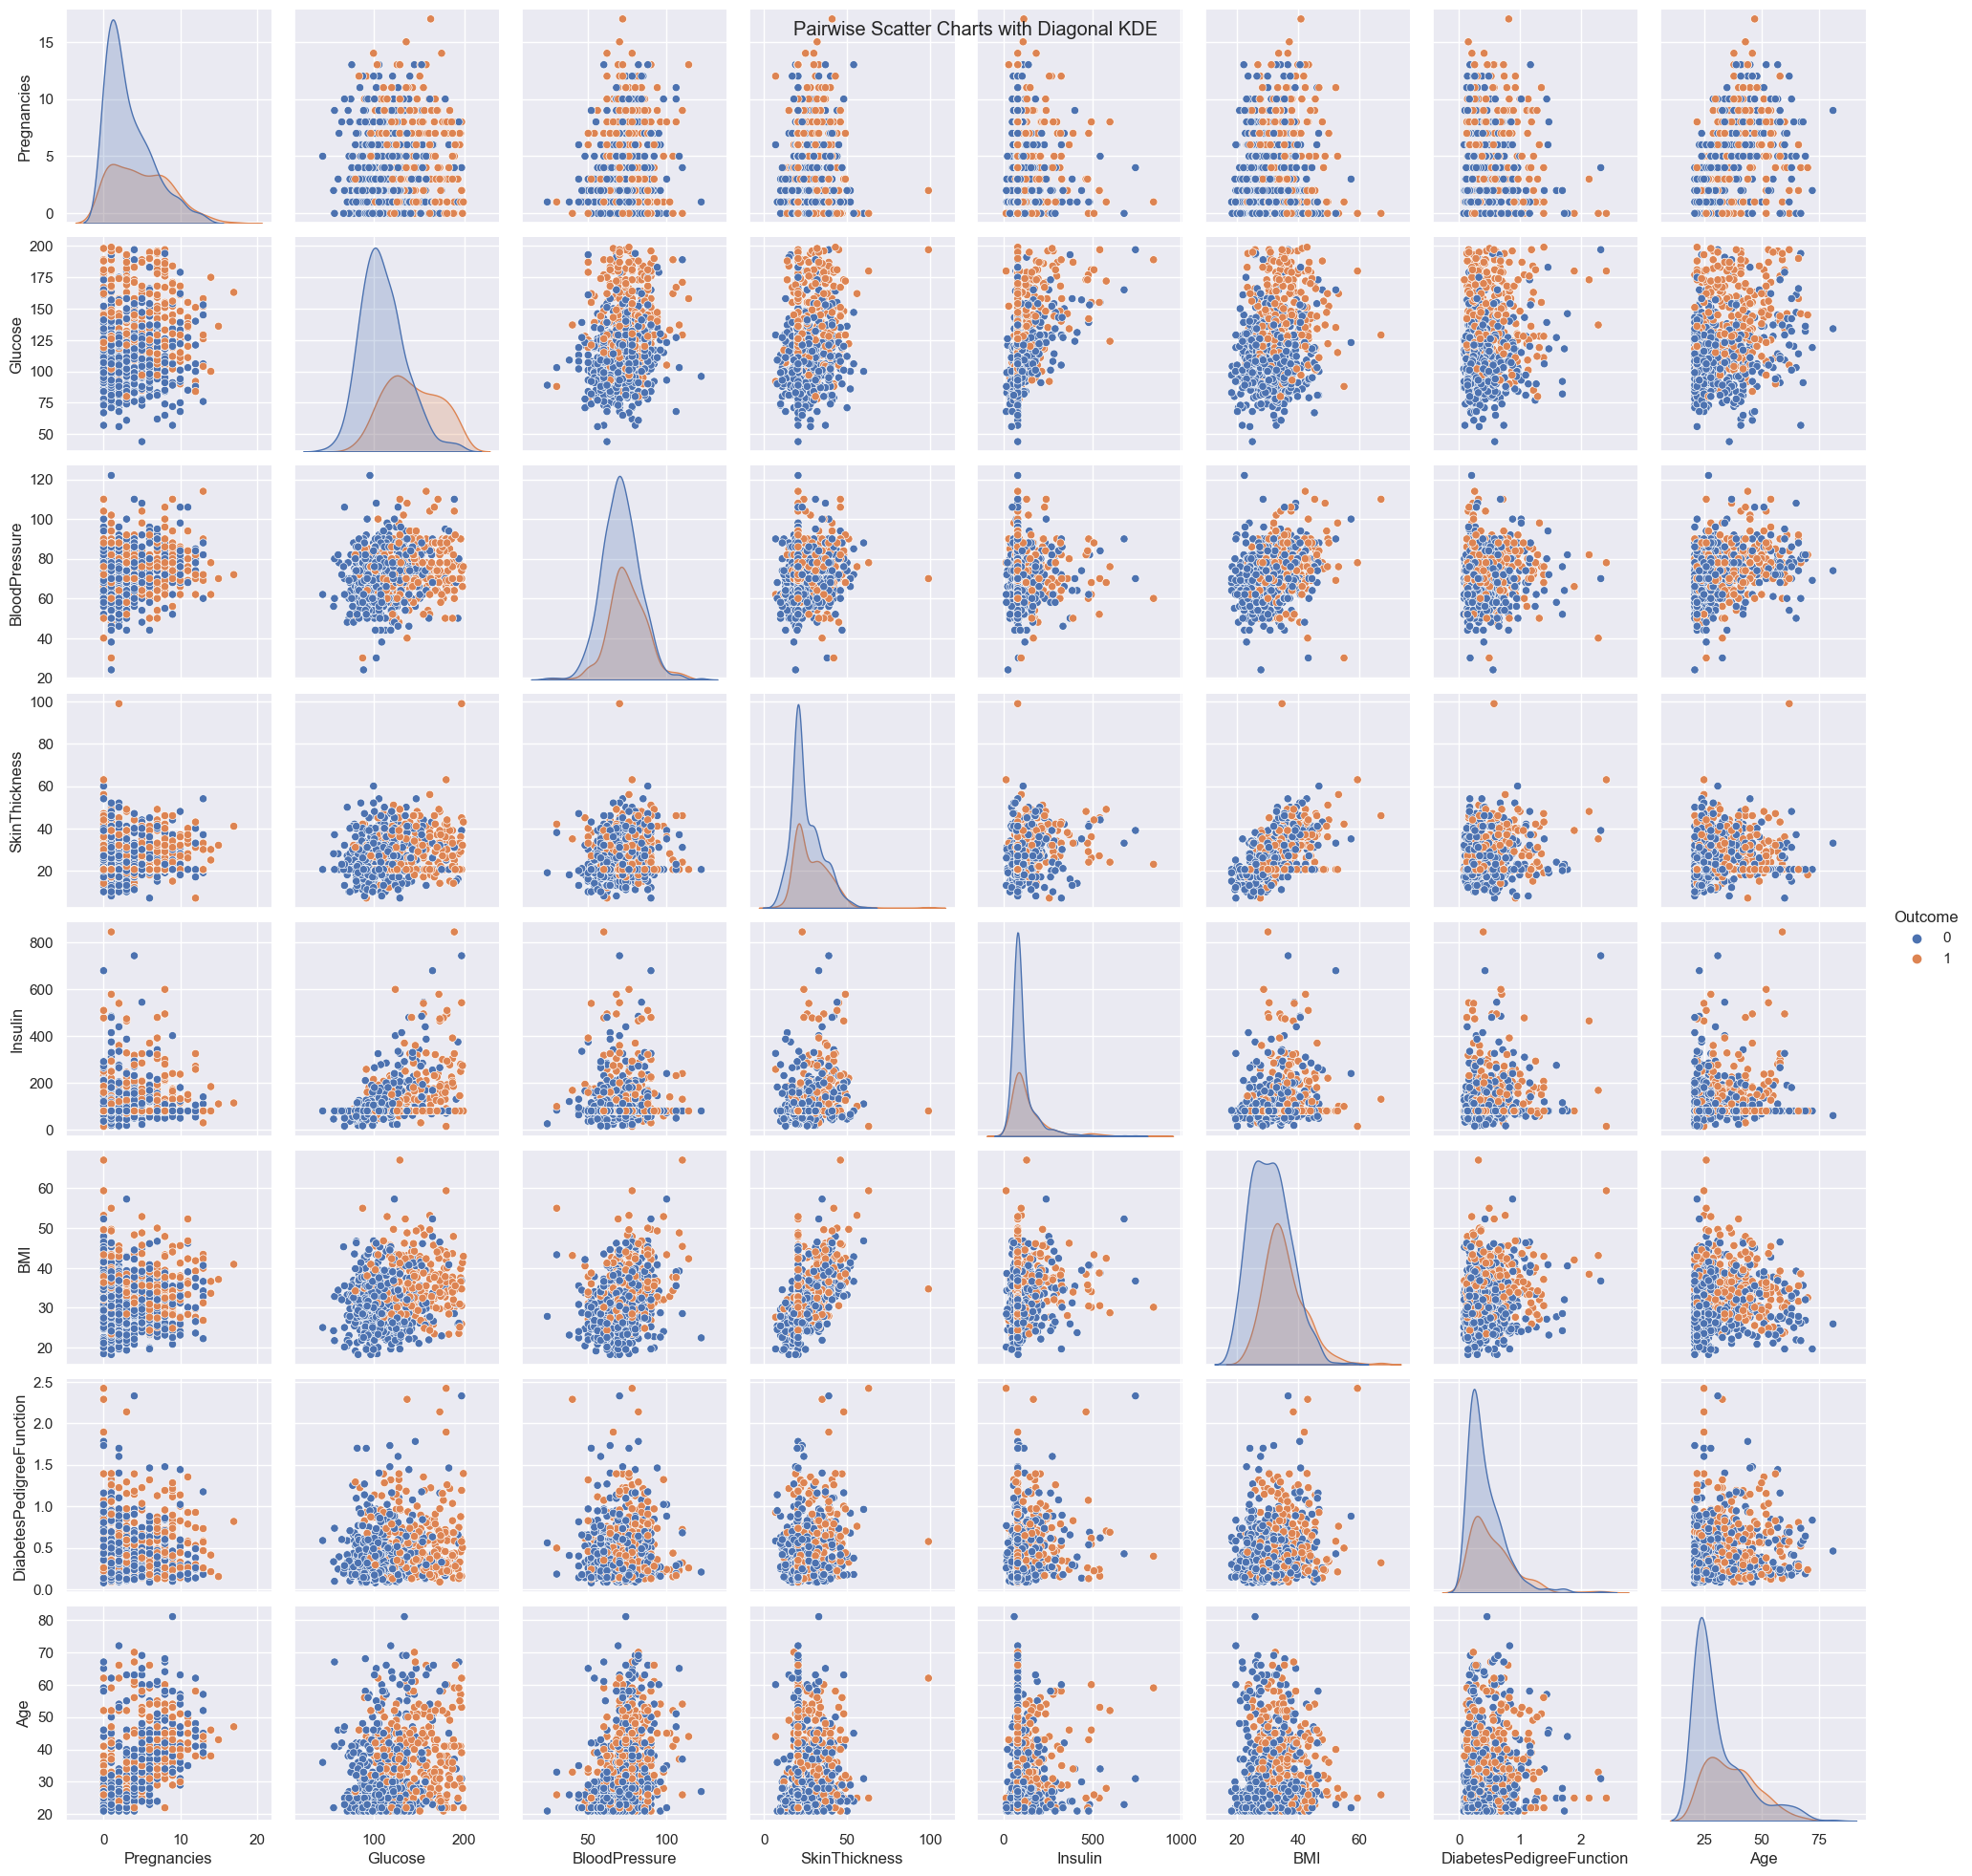

In [18]:
sns.pairplot(df_healthcare_dataset, hue='Outcome', diag_kind='kde')
plt.suptitle("Pairwise Scatter Charts with Diagonal KDE")
plt.show()

#### Ploting the Correlation analysis with a heatmap

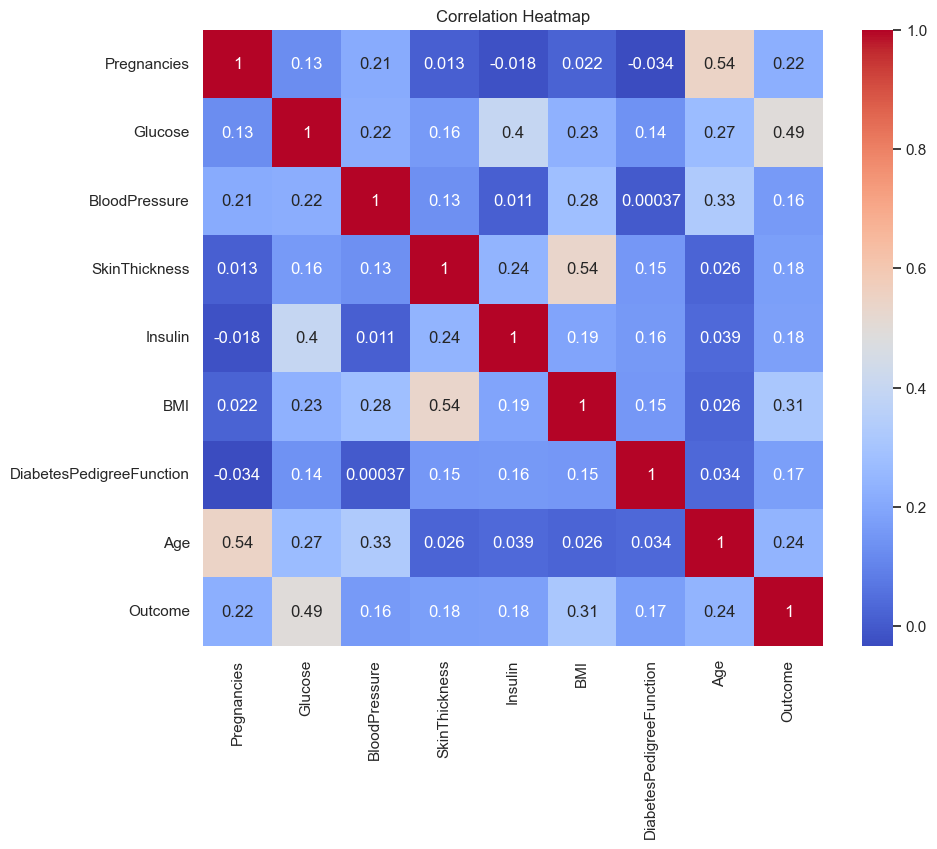

In [19]:
# Correlation analysis with a heatmap
correlation_matrix = df_healthcare_dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Findings:

From the pairplot i have observed relationship between variables,
1) There seems to be a positive correlation between Glucose and the Outcome.
2) There is no clear linear relationship between BloodPressure, SkinThickness, Insulin, and BMI with the Outcome.

From the heatmap:
3) Variables such as Glucose, BMI, and Age show relatively higher positive correlations with the Outcome.
4) Variables like BloodPressure,DPI and SkinThickness have lower correlations with the Outcome.

# Project Task: Week 2

## Data Modeling:

### Strategies for model building

Model Selection Strategies:
As iam dealing with a binary classification problem 'diabetic' or 'not diabetic', iam considering algorithms suitable for this task, such as Logistic Regression, Random Forest, Gradient Boosting, Support Vector Machines, and Neural Networks.


In [20]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Neural Network': MLPClassifier(random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    print(f"Classifier: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("============================\n")

Classifier: Logistic Regression
Confusion Matrix:
[[83 16]
 [20 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154


Classifier: Random Forest
Confusion Matrix:
[[80 19]
 [17 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154


Classifier: Gradient Boosting
Confusion Matrix:
[[78 21]
 [15 40]]

Classification Report:
              precision    recall  f1-score   support

           0      

### Comparing various models with the results from KNN algorithm

In [21]:
# Now let's compare KNN results with other classifiers
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_y_pred = knn.predict(X_test_scaled)

print("K-Nearest Neighbors (KNN)")
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_y_pred))
print("\nClassification Report:")
print(classification_report(y_test, knn_y_pred))

K-Nearest Neighbors (KNN)
Confusion Matrix:
[[79 20]
 [16 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



### Classification report by analyzing sensitivity, specificity, AUC (ROC curve)

Classifier: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

ROC-AUC Score: 0.8220


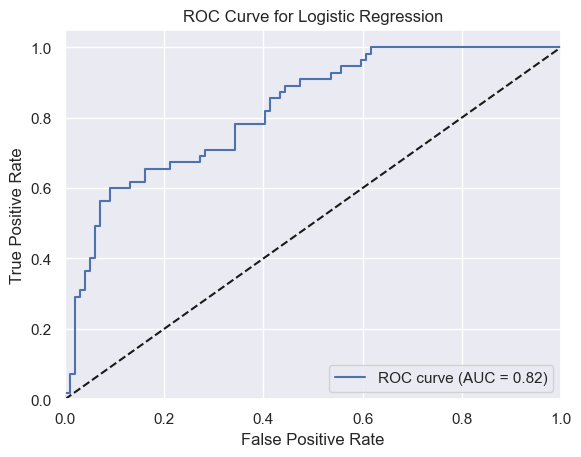


Classifier: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

ROC-AUC Score: 0.8364


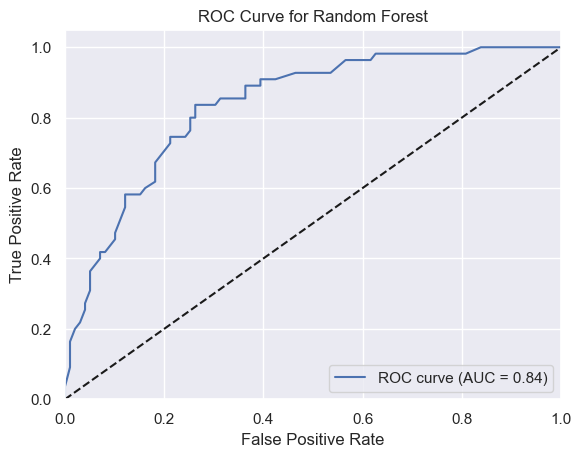


Classifier: Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        99
           1       0.66      0.73      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154

ROC-AUC Score: 0.8180


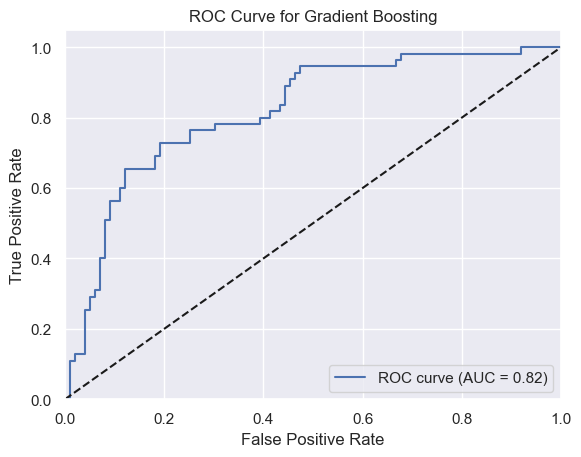


Classifier: Support Vector Machine
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154


Classifier: Neural Network
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

ROC-AUC Score: 0.8125


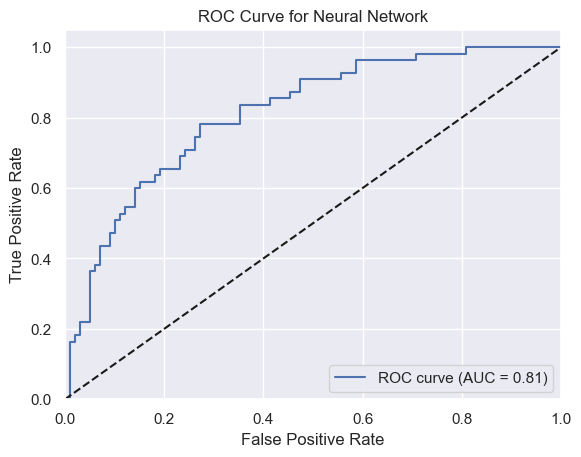

In [22]:
# Initialize a dictionary to store classification reports
classification_reports = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    if hasattr(clf, 'predict_proba'):
        # Calculate ROC-AUC score
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test_scaled)[:, 1])
        
        classification_reports[name] = {
            'classification_report': classification_report(y_test, y_pred),
            'roc_auc': roc_auc,
            'fpr': fpr,
            'tpr': tpr
        }
    else:
        classification_reports[name] = {
            'classification_report': classification_report(y_test, y_pred),
            'roc_auc': None,
            'fpr': None,
            'tpr': None
        }

# Print classification reports, ROC-AUC scores, and plot ROC curves
for name, report in classification_reports.items():
    print(f"Classifier: {name}")
    print("Classification Report:")
    print(report['classification_report'])
    
    if report['roc_auc'] is not None:
        print(f"ROC-AUC Score: {report['roc_auc']:.4f}")
        plt.figure()
        plt.plot(report['fpr'], report['tpr'], label=f"ROC curve (AUC = {report['roc_auc']:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc="lower right")
        plt.show()
        
    print("============================\n")

In [23]:
df_healthcare_dataset.to_excel('outdata.xlsx', index=False)